In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading companies.csv file into a dataframe
companies = pd.read_csv('companies.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte

Clearly an attempt to read the companies.csv file resulted in an encoding error. We would now try to detect its encoding using a Python library, namely chardet. 

In [3]:
# Chardet: The Universal Character Encoding Detector (ASCII, UTF-8, UTF-16, UTF-32,Big5, GB2312, EUC-TW, HZ-GB-2312 etc)
import chardet

In [4]:
with open('companies.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


So chardet is 100% confident that the right encoding is "ASCII". Let's see if that's correct:

In [5]:
# read in the file with the encoding detected by chardet
companies = pd.read_csv('companies.csv', encoding='ascii')

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 5648: ordinal not in range(128)

As is evident from the result achieved above, it turns out 'ascii' isn't working. Let's try with some other encoding scheme:

In [6]:
# read in the file with an encoding, other than ascii
companies = pd.read_csv('companies.csv', encoding='ISO-8859-1')

So, companies.csv file was actually encoded in ISO-8859-1 schema

In [7]:
rounds = pd.read_csv('rounds2.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte

We can see that the same encoding error has occured with our "rounds2.csv" file as well. Let's try resorting to our Python library chardet for a possible resolution.

In [8]:
with open('rounds2.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


chardet believes the encoding to be 'ascii'. Let's try with that. 

In [9]:
rounds = pd.read_csv('rounds2.csv', encoding = 'ascii')

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 7959: ordinal not in range(128)

Retrying with 'ISO-8859-1' encoding scheme. 

In [10]:
rounds2 = pd.read_csv('rounds2.csv', encoding = 'ISO-8859-1')

# Understanding the "companies" dataset

In [11]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [12]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [13]:
companies.sample(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
749,/Organization/Abound-Solar,Abound Solar,http://www.abound.com,Clean Technology|Solar,closed,USA,CO,CO - Other,Loveland,01-01-2007
6287,/Organization/Beijing-Shiji-Information-Techno...,Beijing Shiji Information Technology,http://www.shijinet.com.cn/en/,Information Technology,operating,CHN,22,Beijing,Beijing,01-01-1995
35176,/Organization/Meican,Meican,http://meican.com,Hospitality|Manufacturing|Online Reservations,operating,CHN,NaN,NaN,NaN,01-01-2011
14011,/Organization/Crs-Reprocessing-Services,CRS Reprocessing Services,http://www.crs-reprocessing.com,Manufacturing,operating,USA,KY,Louisville,Louisville,NaN
11921,/Organization/Cloudmunch,CloudMunch,http://www.cloudmunch.com,Cloud Data Services|Cloud Infrastructure|Software,operating,NaN,NaN,NaN,NaN,01-01-2011
12336,/Organization/Coinkeeper,CoinKeeper,http://coinkeeper.me,Finance|Personalization,operating,RUS,66,St. Petersburg,Saint Petersburg,15-05-2011
17616,/Organization/Elasticsearch,Elastic,https://www.elastic.co,Cloud Computing|Open Source|Real Time|Search|S...,operating,USA,CA,SF Bay Area,Mountain View,01-02-2012
23803,/Organization/Gram-Newco,Grand River Aseptic Manufacturing,http://grandriverasepticmfg.com,Biotechnology,operating,USA,MI,Grand Rapids,Grand Rapids,NaN
47387,/Organization/Red-Seraphim,Red Seraphim,http://www.redseraphim.com,Entrepreneur|Games|Mobile Games|Social Games,closed,USA,CA,SF Bay Area,Santa Clara,NaN
3716,/Organization/Appium-Technologies,Appium Technologies,NaN,Application Platforms,acquired,SWE,27,Malmo,MalmÃ¶,01-01-1992


In [14]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [15]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [16]:
companies.describe(include = 'all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Membersuite,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [17]:
companies.shape

(66368, 10)

# Understanding the "rounds2" dataset

In [18]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [19]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [20]:
rounds2.sample(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
32532,/organization/epidemic-sound,/funding-round/c49882577b7d67a443b6cac964bf2477,venture,A,19-05-2014,5000000.0
43206,/organization/hc1-com,/funding-round/dae5847f54f52014bdcfbbf293e52f2a,venture,NaN,12-04-2013,3064000.0
49432,/organization/intuity-medical,/funding-round/51f741e6270ffa7f6ea5643f965686d6,venture,NaN,02-04-2014,3362772.0
47048,/organization/inadco,/funding-round/9c1004f3da7d1b412680f1b3dc2a3ade,venture,B,26-06-2013,11000000.0
109284,/organization/watchmark,/funding-round/cddad6c93b0637a95ce05519204428ac,venture,C,14-12-2001,26600000.0
38879,/ORGANIZATION/GEENIO,/funding-round/983197f457b25ab5405793ae5fe262db,seed,NaN,23-12-2014,2000000.0
98393,/ORGANIZATION/TECHNOLOGY-BUILDERS,/funding-round/d260c09feaaa32bb36dc6d1e2d1c697b,venture,C,29-12-1999,6100000.0
21709,/ORGANIZATION/COGENTA-SYSTEMS,/funding-round/e5cefb65786e5ec99247f076ac948f60,venture,NaN,01-04-2002,NaN
85895,/ORGANIZATION/SAPIO-SYSTEMS-APS,/funding-round/bafbfba6c228f1b38a867dca5ef7f585,venture,NaN,30-10-2007,1040000.0
27002,/organization/den-2,/funding-round/2d6607ce8c85e24bbdf2675cd9b244e0,seed,NaN,23-06-2015,790426.0


In [21]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [22]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [23]:
rounds2.describe(include = 'all')

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,90247,114949,14,8,5033,NaN
top,/ORGANIZATION/SOLARFLARE,/funding-round/6dea58d74e520b75a42e4080d07cb40e,venture,A,01-01-2014,NaN
freq,10,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


1. How many unique companies are present in rounds2?

In [24]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [25]:
rounds2['company_permalink']

0                                       /organization/-fame
1                                    /organization/-qounter
2                                    /organization/-qounter
3                       /organization/-the-one-of-them-inc-
4                                     /organization/0-6-com
                                ...                        
114944                            /organization/zzzzapp-com
114945                            /organization/zzzzapp-com
114946                                 /organization/ãeron
114947                               /organization/ãasys-2
114948    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: company_permalink, Length: 114949, dtype: object

In [26]:
len(rounds2['company_permalink'].unique())

66370

So, 66370 unique companies are present in the "rounds2" dataset

2. How many unique companies are present in "companies" dataset ?

In [27]:
companies['permalink'] = companies['permalink'].str.lower()

In [28]:
companies['permalink']

0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                 /organization/ãeron
66366                               /organization/ãasys-2
66367    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: permalink, Length: 66368, dtype: object

In [29]:
len(companies['permalink'].unique())

66368

As from the result obtained, there are 66,368 unique companies in the "companies" dataset

3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

In [30]:
# understanding the number of rows & columns in companies dataset
companies.shape

(66368, 10)

Therefore, there are 66,368 rows & 10 columns in the companies dataset. Note that there are 66,368 (same as the number of rows) unique values in the 'permalink' column. This column (or attribute), thus, look like a solid fit to serve as a possible unique key for our dataset.
Let's reinforce our finding by determining the number of unique values in the 'name' column (or attribute) of our companies dataset.

In [31]:
companies['name'] = companies['name'].str.lower()

In [32]:
len(companies['name'].unique())

66035

Clearly, there are only 66,035 unique entries for the 'name' attribute of companies dataset, against a requirement of 66,368. We shall hence discard it as a possible unique key candidate. <br>
Hence, answer for this question is 'permalink' column (or attribute).

4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [33]:
rounds2_unique_company_list = rounds2['company_permalink'].unique()

In [34]:
rounds2_unique_company_list

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ...,
       '/organization/ã\x81eron', '/organization/ã\x94asys-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

In [35]:
len(rounds2_unique_company_list)

66370

In [36]:
companies_unique_company_list = companies['permalink'].unique()

In [37]:
companies_unique_company_list 

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ...,
       '/organization/ã\x81eron', '/organization/ã\x94asys-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

In [38]:
len(companies_unique_company_list)

66368

Since, the number of unique companies in the 'companies' dataset 66368 < number of unique companies in the 'rounds2'66370, clearly there are few companies in 'rounds2' which are not present in 'companies'. <br>
So answer is Y.

Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [39]:
master_frame = pd.merge(companies, rounds2, left_on = 'permalink', right_on = 'company_permalink')

In [40]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [41]:
master_frame.shape

(114942, 16)

In [42]:
master_frame.drop(['company_permalink'], axis = 1)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114938,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114939,/organization/ãeron,ãeron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114940,/organization/ãasys-2,ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [43]:
master_frame.shape

(114942, 16)

As is evident from the shape of master_frame, there are 114,942 observations present in it. 

# Funding Type Analysis

Which funding type to choose among seed, angel, venture & private equity ? 

In [44]:
master_frame['funding_round_type'].isnull().sum()

0

Great! That means we have all data points for type of funding attribute 'funding_round_type' available. 

In [45]:
# filltering out the master_frame so that it consists only of observations with seed, angel, venture & private_equity
# as its funding type
master_frame = master_frame[( master_frame['funding_round_type'] == 'angel') | (master_frame['funding_round_type'] == 'seed') | (master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'private_equity')]

In [46]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [47]:
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].describe(include = 'all')

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09
seed,23602.0,7.197796e+05,2.221772e+06,0.0,55000.00,275000.0,1000000.0,2.000000e+08
venture,50228.0,1.174895e+07,8.635207e+07,0.0,1600901.75,5000000.0,12000000.0,1.760000e+10


But the above data might be erroneous as we didn't account for 'raised_amount_usd' attribute consisting of NaN values.

In [48]:
master_frame['raised_amount_usd'].isnull().sum()

13764

The data shows that we have 13,764 null values in our 'raised_amount_usd' column. <br>
Let us try & fix that. 

In [49]:
missing_mask = master_frame['raised_amount_usd'].isna()

In [50]:
missing_mask

0         False
1          True
2         False
3         False
4         False
          ...  
114935    False
114936    False
114938    False
114939     True
114940    False
Name: raised_amount_usd, Length: 94390, dtype: bool

In [51]:
mapping_dict = dict({'angel': 400000.0, 'private_equity': 20000000.0, 'seed': 275000.0, 'venture': 12000000.0})

Our strategy for filling up null values in the 'raised_amount_usd' column is to fill it with the median raised amount values for each investment type. For instance, if we have a missing entry corresponding to the 'venture' funding type, then fill it with '5000000.0' (refer the table above)

In [52]:
master_frame.loc[missing_mask, 'raised_amount_usd'] = master_frame.loc[missing_mask, 'funding_round_type'].map(mapping_dict)

In [53]:
master_frame['raised_amount_usd'].isnull().sum()

0

Great! Now we have 0 missing values in our 'raised_amount_usd' column.

In [54]:
master_frame[['funding_round_type', 'raised_amount_usd']]


,funding_round_type,raised_amount_usd
0,venture,10000000.0
1,venture,12000000.0
2,seed,700000.0
3,venture,3406878.0
4,venture,2000000.0
...,...,...
114935,seed,7000.0
114936,seed,33149.0
114938,seed,32842.0
114939,venture,12000000.0


In [55]:
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,6094.0,8.455620e+05,6.616035e+06,0.0,200000.0,400000.0,750000.0,4.945120e+08
private_equity,2285.0,6.516649e+07,1.833563e+08,0.0,6500000.0,20000000.0,62400000.0,4.745460e+09
seed,30518.0,6.189835e+05,1.962714e+06,0.0,100000.0,275000.0,660762.0,2.000000e+08
venture,55493.0,1.177277e+07,8.215355e+07,0.0,2000000.0,6000000.0,12000000.0,1.760000e+10


These are the findings obtained: <br>
Median values for investments done in: <br>
1. Seed Round: 275,000 USD <br>
2. Angel Round: 400,000 USD <br>
3. Venture Round: 6 Million USD <br>
4. Private Equity Round: 20 Million USD <br>
Clearly, Venture Round funding is best suited to Spark Funds budgetary needs. 

Let's plot our findings on a bar plot. 

In [56]:
investment_types = ['Seed', 'Angel', 'Venture', 'Private Equity']
investment_median_values = [0.275, 0.4, 6, 20]

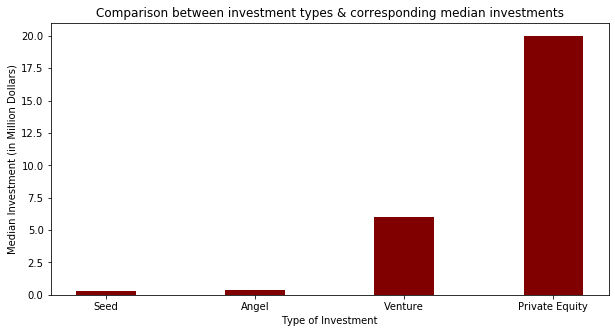

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(investment_types, investment_median_values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Type of Investment") 
plt.ylabel("Median Investment (in Million Dollars)") 
plt.title("Comparison between investment types & corresponding median investments") 
plt.show() 

Since we are confident that venture funding is the way to go, we would now proceed to filter out all observations with funding round type not as 'venture' 

In [58]:
master_frame = master_frame[ master_frame['funding_round_type'] == 'venture']

In [59]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,12000000.0
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114927,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114929,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0
114930,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0
114934,/organization/zznode-science-and-technology-co...,zznode science and technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.0


# Country Analysis

Top 3 countries receiving the most investment dollars!

In [60]:
# finding out how many country code values are missing from our 'country_code' column
master_frame['country_code'].isnull().sum()

2874

As is visible from the data, there are 2,874 null values present in our 'country_code' column. <br>
We are now tasked with the objective of plugging these null values. Since, country code is a categorical variable, we would be going the 'mode' way of plugging these null values. <br>
Mode is simply the most frequently occuring country code in the 'country_code' column.

In [61]:
mode = master_frame['country_code'].mode()[0]

In [62]:
mode

'USA'

So, USA is our most frequently occuring country code. Time to plug in nulls with 'USA'!

In [63]:
master_frame['country_code'] = master_frame['country_code'].fillna(mode)

In [64]:
master_frame['country_code'].isnull().sum()

0

Plug complete! 0 nulls now. 

In [65]:
funding_by_country = (master_frame.groupby(['country_code'])['raised_amount_usd'].sum())/1000000

In [66]:
funding_by_country

country_code
ARE       438.617539
ARG       446.338819
ARM        26.517500
AUS      1538.934948
AUT       762.954952
           ...      
UKR        17.792461
URY        19.830000
USA    483896.951210
VNM       228.880509
ZAF       402.062861
Name: raised_amount_usd, Length: 103, dtype: float64

In [67]:
funding_by_country = funding_by_country.sort_values( ascending = False )

In [68]:
funding_by_country = funding_by_country[:9]

In [69]:
top9 = funding_by_country.to_frame()

In [70]:
top9 = top9.reset_index()

In [71]:
top9.columns

Index(['country_code', 'raised_amount_usd'], dtype='object')

In [72]:
top9

,country_code,raised_amount_usd
0,USA,483896.951210
1,CHN,46111.418773
2,GBR,23221.627416
3,IND,16407.858718
4,CAN,10663.332317
5,DEU,9082.959822
6,ISR,8275.514579
7,FRA,8075.536732
8,JPN,3891.676611


The table shows the top 9 countries receiving the most investment money 9 (figures in million dollars)

Let's plot it!

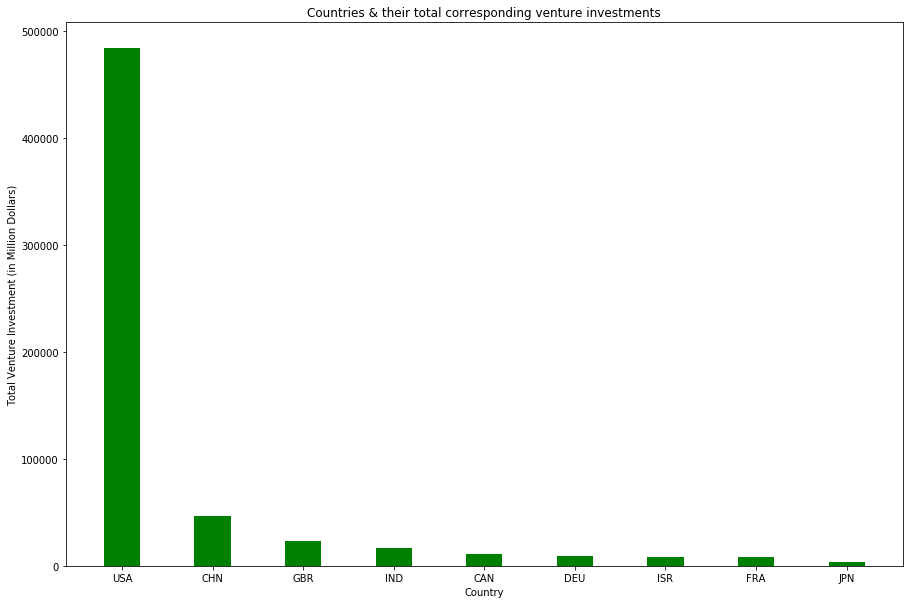

In [73]:
country_code = top9['country_code']
raised_amount_usd = top9['raised_amount_usd']

fig = plt.figure(figsize = (15, 10)) 
  
# creating the bar plot 
plt.bar(country_code, raised_amount_usd, color ='green',  
        width = 0.4) 
  
plt.xlabel("Country") 
plt.ylabel("Total Venture Investment (in Million Dollars)") 
plt.title("Countries & their total corresponding venture investments") 
plt.show() 


Our end objective is to identify the top 3 english speaking countries from the above plot. Clearly, they are <br>
1. USA (United States of America) <br>
2. GBR (Great Britain) <br>
3. IND (India)

# Sector Analysis 1 - Finding the main sector for each company

Since we are now concerned only with USA, GBR & IND, let's proceed to filter out unnecessary observation from our master frame. 

In [74]:
master_frame = master_frame[(master_frame['country_code'] == 'USA') | (master_frame['country_code'] == 'GBR') | (master_frame['country_code'] == 'IND')]

In [75]:
master_frame 

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,12000000.0
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
5,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,12000000.0
10,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114915,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0
114916,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0
114927,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114929,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0


In [76]:
master_frame['category_list'].isnull().sum()

920

There are 920 null values in the category list column of our master frame. Since its a tough call to predict the categories a company might be operating in, & additionally 920 is a small number compared to the deluge of 44,541 values we have available, let's drop all these nulls off. 

In [77]:
master_frame = master_frame[~pd.isnull(master_frame['category_list'])] 

In [78]:
master_frame['category_list'].isnull().sum()

0

So, nulls issue in the 'category list' column stands resolved. 

In [79]:
# finding the primary sector of a company by using the business rule available
master_frame['primary_sector'] = master_frame['category_list'].apply( lambda x : x.split('|')[0])

In [80]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,12000000.0,Application Platforms
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,Apps
5,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,12000000.0,Software
10,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114913,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,Biotechnology
114915,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,Biotechnology
114916,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,Biotechnology
114927,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,E-Commerce


In [81]:
mappings = pd.read_csv('mapping.csv')

In [82]:
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Droppping the row with category_list value as NaN:

In [83]:
mappings = mappings[~pd.isnull(mappings['category_list'])]

Dropping the 'Blanks' column:

In [84]:
mappings = mappings.drop(['Blanks'], axis = 1)


In [85]:
mappings.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


The above dataframe shows the cleaned mapping dataframe. <br>
It currently has the category-sector mappings in a wide body format. That doesn't quite suit our purpose. <br>
We shall therefore try to convert this into the more useful long body format. 

In [86]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = list(mappings.columns[1:])

# take the setdiff() to get the rest of the variables
id_vars = list(np.setdiff1d(mappings.columns, value_vars))

print(value_vars, "\n")
print(id_vars)


['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [87]:
long_df = pd.melt(mappings, 
        id_vars = id_vars, 
        value_vars = value_vars)
long_df

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
5491,Wholesale,"Social, Finance, Analytics, Advertising",0
5492,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5493,Wireless,"Social, Finance, Analytics, Advertising",0
5494,Women,"Social, Finance, Analytics, Advertising",0


Let's filter all observations having value as 0. Additionally, let's drop the 'value' column altogether. That's redundant. 

In [88]:
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [89]:
long_df

,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [90]:
# renaming our 'variable' column to 'main_sector'
long_df = long_df.rename( columns = {'variable':'main_sector'})

In [91]:
long_df

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [92]:
master_frame = pd.merge(master_frame, long_df, left_on = 'primary_sector', right_on = 'category_list')

In [93]:
master_frame

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Media,Entertainment
4,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40654,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,NaN,29-12-2010,3500000.0,Tracking,Tracking,Others
40655,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.0,Tracking,Tracking,Others
40656,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.0,Tracking,Tracking,Others
40657,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.0,Tracking,Tracking,Others


In [94]:
# cleaning the master frame by dropping redundant column 'category_list_y'
master_frame = master_frame.drop(['category_list_y'], axis = 1)

In [95]:
master_frame

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
4,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40654,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,NaN,29-12-2010,3500000.0,Tracking,Others
40655,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.0,Tracking,Others
40656,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.0,Tracking,Others
40657,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.0,Tracking,Others


That completes our checkpoint's objective. As is evident from the above dataframe, we have last two columns as 'primary_sector' & 'main_sector', expressly giving a correlation between the company's operating category & business defined main sector. Let's have a closer look into it.

In [96]:
master_frame[['primary_sector', 'main_sector']]

,primary_sector,main_sector
0,Media,Entertainment
1,Media,Entertainment
2,Media,Entertainment
3,Media,Entertainment
4,Media,Entertainment
...,...,...
40654,Tracking,Others
40655,Tracking,Others
40656,Tracking,Others
40657,Tracking,Others


# Sector Analysis 2 - Mining for useful insights

In [97]:
# changing all values in the 'raised_amount_usd' column from USD to million USD
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].apply( lambda x : x/1000000)

In [98]:
master_frame

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000000,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.000000,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.800000,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18.000000,Media,Entertainment
4,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.000000,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40654,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,NaN,29-12-2010,3.500000,Tracking,Others
40655,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4.220000,Tracking,Others
40656,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2.000000,Tracking,Others
40657,/organization/yapta,yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1.786563,Tracking,Others


In [99]:
# dropping all observations having an investment value less than 5 & greater than 15. 
# this is because we are only concerned with investments done in the range of [5, 15] Million USD
master_frame = master_frame[ (master_frame['raised_amount_usd'] >= 5) & (master_frame['raised_amount_usd'] <= 15)]

In [100]:
master_frame.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.8,Media,Entertainment
4,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.0,Media,Entertainment
14,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5.0,Media,Entertainment


In [104]:
master_frame.shape

(15268, 18)

So there are 15,268 counts of investments done for countries of USA, GBR & IND of type venture in the range of 5-15 million USD.

In [101]:
# creating a dataframe D1, consisting of values only for USA
D1 = master_frame[ master_frame['country_code'] == 'USA']

In [106]:
# count of invesments done in USA alone
D1.shape

(14043, 18)

14,043 is the number of rounds in which companies in USA raised funding. 

In [107]:
# value of investment amount, invested by companies present in USA
D1['raised_amount_usd'].sum()

132460.211901

That's 1,32,460 million USD!

In [108]:
# # creating a dataframe D2, consisting of values only for GBR
D2 = master_frame[ master_frame['country_code'] == 'GBR']

In [110]:
# count of invesments done in GBR alone
D2.shape

(781, 18)

781 is the number of funding rounds companies in GBR have been party to.

In [111]:
# value of investment amount, invested by companies present in GBR
D2['raised_amount_usd'].sum()

7476.704358

Woah. 7,476 million USD has been funneled into companies looking for funding in GBR. 

In [103]:
# creating a dataframe D3, consisting of values only for IND
D3 = master_frame[ master_frame['country_code'] == 'IND']

In [112]:
# count of invesments done in IND alone
D3.shape

(444, 18)

Companies in India have witnessed a total of 444 funding rounds. 

In [114]:
# value of investment amount, invested by companies present in IND
D3['raised_amount_usd'].sum()

4423.537552

4.4 billion USD (or 4,4423 million USD) has been bestowed upon by venture firms on companies present in India.

## Finding the top 3 most heavily invested sectors (by count of investments done) in USA, GBR & IND

In [115]:
D1_top3_sectors = D1.groupby(['main_sector'])['raised_amount_usd'].count().sort_values(ascending=False)[0:3]

In [116]:
D1_top3_sectors = D1_top3_sectors.to_frame()


In [117]:
D1_top3_sectors = D1_top3_sectors.reset_index()

In [118]:
D1_top3_sectors = D1_top3_sectors.rename( columns = {'main_sector': 'Main Sector', 'raised_amount_usd': 'Investment Count'})

In [119]:
D1_top3_sectors

,Main Sector,Investment Count
0,Others,3613
1,Cleantech / Semiconductors,2683
2,"Social, Finance, Analytics, Advertising",2465


In [120]:
D2_top3_sectors = D2.groupby(['main_sector'])['raised_amount_usd'].count().sort_values(ascending=False)[0:3].to_frame()

In [121]:
D2_top3_sectors = D2_top3_sectors.reset_index().rename( columns = {'main_sector': 'Main Sector', 'raised_amount_usd': 'Investment Count'})
D2_top3_sectors

,Main Sector,Investment Count
0,Others,207
1,Cleantech / Semiconductors,150
2,"Social, Finance, Analytics, Advertising",139


In [122]:
D3_top3_sectors = D3.groupby(['main_sector'])['raised_amount_usd'].count().sort_values(ascending=False)[0:3].to_frame().reset_index()

In [123]:
D3_top3_sectors = D3_top3_sectors.rename( columns = {'main_sector': 'Main Sector', 'raised_amount_usd': 'Investment Count'} )
D3_top3_sectors

,Main Sector,Investment Count
0,Others,157
1,"News, Search and Messaging",76
2,"Social, Finance, Analytics, Advertising",59


Plotting top 3 sectors (by count of investments done) country-wise: 

Text(0.5, 1.0, 'IND')

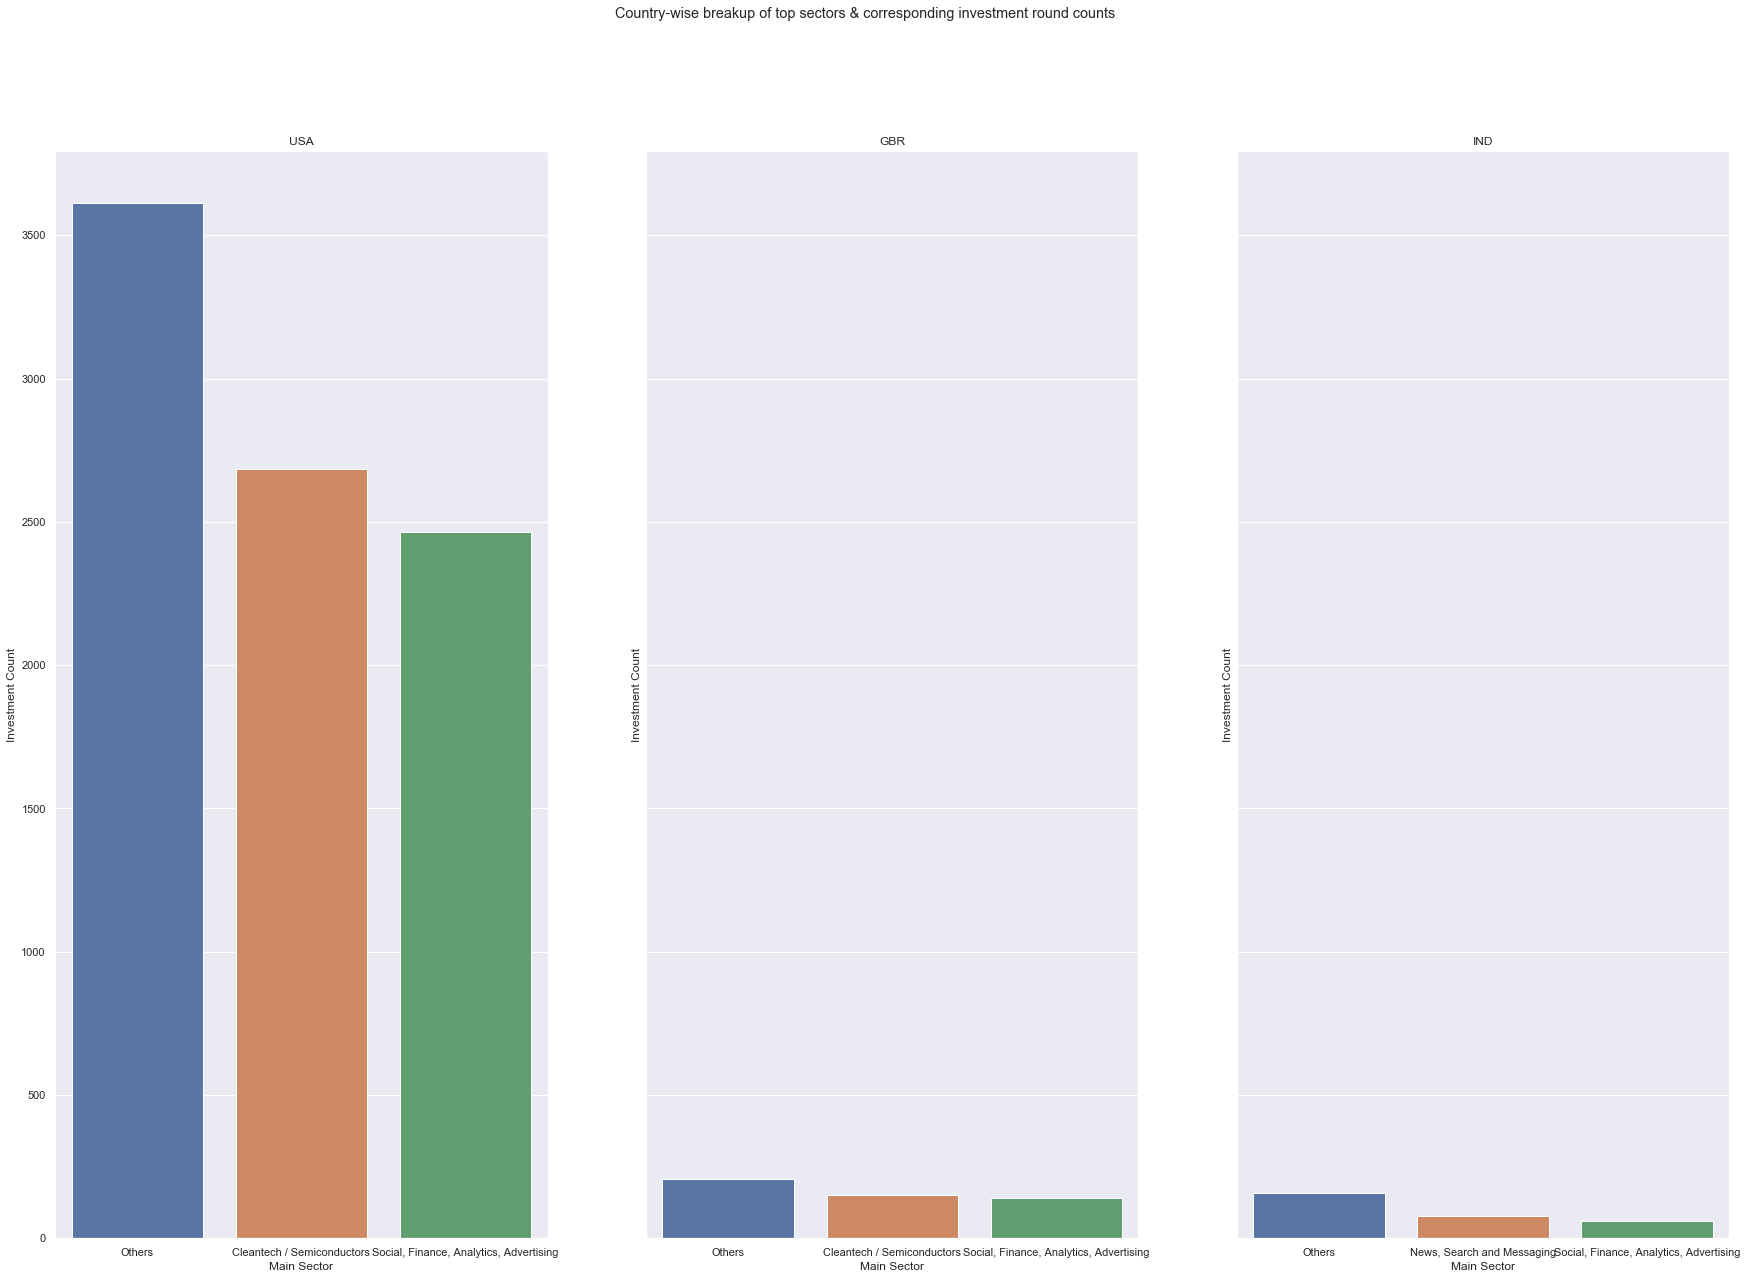

In [143]:
import seaborn as sns
sns.set()

fig, axes = plt.subplots(1, 3, figsize=(30, 20), sharey=True)
fig.suptitle('Country-wise breakup of top sectors & corresponding investment round counts')

# Bulbasaur
sns.barplot(ax=axes[0], x=D1_top3_sectors['Main Sector'], y=D1_top3_sectors['Investment Count'])
axes[0].set_title('USA')

# Charmander
sns.barplot(ax=axes[1], x=D2_top3_sectors['Main Sector'], y=D2_top3_sectors['Investment Count'])
axes[1].set_title('GBR')

# Squirtle
sns.barplot(ax=axes[2], x=D3_top3_sectors['Main Sector'], y=D3_top3_sectors['Investment Count'])
axes[2].set_title('IND')

## Finding the top funded company in the top invested sector country-wise:

In [125]:
D1_Others = D1[ D1['main_sector'] == 'Others']

In [127]:
D2_Others = D2[ D2['main_sector'] == 'Others']

In [129]:
D3_Others = D3[ D3['main_sector'] == 'Others']

In [134]:
D1_Others.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

permalink
/organization/emn8                     89.198945
/organization/payoneer                 80.000000
/organization/netscaler                73.000000
/organization/social-bicycles          72.000000
/organization/virtustream              64.300000
                                         ...    
/organization/axeda                     5.000000
/organization/ludic-labs                5.000000
/organization/oneenergy-renewables      5.000000
/organization/peek-kids                 5.000000
/organization/unav-microelectronics     5.000000
Name: raised_amount_usd, Length: 2515, dtype: float64

Therefore, for USA it's Emn8

In [132]:
D2_Others.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

permalink
/organization/notonthehighstreet    50.90
/organization/datanomic             42.30
/organization/ip-access             37.00
/organization/electric-cloud        37.00
/organization/sensage               36.25
                                    ...  
/organization/bacula-systems         5.00
/organization/udex                   5.00
/organization/parcelgenie            5.00
/organization/bullguard              5.00
/organization/vector-watch           5.00
Name: raised_amount_usd, Length: 164, dtype: float64

For GBR, it is 'Not On The High Street'

In [135]:
D3_Others.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

permalink
/organization/firstcry-com                                                              39.0
/organization/myntra                                                                    38.0
/organization/snapdeal                                                                  36.0
/organization/maharana-infrastructure-and-professional-services-private-limited-mips    33.6
/organization/commonfloor                                                               32.9
                                                                                        ... 
/organization/vedantu-innovations                                                        5.0
/organization/liases-foras                                                               5.0
/organization/tastykhana                                                                 5.0
/organization/reznext                                                                    5.0
/organization/urban-ladder                                  

For India, FirstCry.com takes the first place

# Finding the top funded company in the second highest invested sector country-wise:

In [136]:
D1_Cl_Semi = D1[ D1['main_sector'] == 'Cleantech / Semiconductors']

In [137]:
D1_Cl_Semi.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

permalink
/organization/quellan                173.000000
/organization/starboard-resources     96.000000
/organization/biodesix                75.300000
/organization/tigo-energy             68.739496
/organization/forsight-labs           61.300001
                                        ...    
/organization/payward                  5.000000
/organization/azuray-technologies      5.000000
/organization/pinoccio                 5.000000
/organization/aum-cardiovascular       5.000000
/organization/1bog                     5.000000
Name: raised_amount_usd, Length: 1830, dtype: float64

Quellan is the highest invested company in USA in its second highly invested sector by data. 

In [138]:
D2_Cl_Semi = D2[ D2['main_sector'] == 'Cleantech / Semiconductors']

In [139]:
D2_Cl_Semi.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

permalink
/organization/eusa-pharma                                                      35.600000
/organization/horizon-discovery                                                31.353719
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29.132906
/organization/elixent                                                          25.000000
/organization/mode-diagnostics                                                 24.000000
                                                                                 ...    
/organization/lamellar-biomedical                                               5.301059
/organization/mmic-solutions                                                    5.250000
/organization/flowline                                                          5.104587
/organization/ignis-energy                                                      5.014644
/organization/exco-intouch                                                      5.000000
Name: raise

Eusa Pharma is the highest invested company in GBR in its second highly invested sector by data. 

In [140]:
D3_News_Search_Msg = D3[ D3['main_sector'] == 'News, Search and Messaging']

In [141]:
D3_News_Search_Msg.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

permalink
/organization/roadrunnr                           33.0
/organization/gupshup-technology-india-pvt-ltd    33.0
/organization/traffline                           24.0
/organization/imimobile                           23.0
/organization/sms-gupshup                         22.0
                                                  ... 
/organization/localoye                             5.0
/organization/wooplr                               5.0
/organization/belong                               5.0
/organization/jugnoo                               5.0
/organization/zoomo                                5.0
Name: raised_amount_usd, Length: 63, dtype: float64

Roadrunnr is the highest invested company in IND in its second highly invested sector by data. 